## Labelling Raw dataset

### Reading dataset and splitting it 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [159]:
file_name='ritu-1722686164.8227277.csv'
df=pd.read_csv(f'RawDataset/{file_name}')
total_rows=len(df)
df_train=df.iloc[total_rows-12000*5:total_rows] #2 sec gap data
df_test=df.iloc[total_rows-12000*5-24000*5:total_rows-12000*5] # 4 sec gap data


In [160]:
df_test.head()

,1388.6854282790293,1397.9351091956305,1327.0208888350228,461.8674004356097,1415.8178256343922,0.0
8679,19.549007,1.497502,-4.755584,4.222259,27.021235,0.0
8680,-4.147908,-1.768045,1.486030,3.825342,-8.460800,0.0
8681,-3.761707,-2.822161,2.724695,4.286667,-11.870363,0.0
8682,11.692634,0.795481,0.007181,3.744306,4.652206,0.0
8683,4.957697,0.682408,4.326487,2.840591,4.268179,0.0


### Filtering our dataset by applying envelope

In [161]:
from EMGFilter import EMG_filter
for channel in range(0,6):
  filtered_values =[]
  emg_filter=EMG_filter(sample_frequency=1000,range_=0.05,reference_available=False)
  for i in df_train.iloc[:,channel]:
    filtered=emg_filter.filter(i,0)
    filtered_values.append(filtered)
  df_train[f'filteredc{channel}']=filtered_values


for channel in range(0,6):
  filtered_values =[]
  emg_filter=EMG_filter(sample_frequency=1000,range_=0.05,reference_available=False)
  for i in df_test.iloc[:,channel]:
    filtered=emg_filter.filter(i,0)
    filtered_values.append(filtered)
  df_test[f'filteredc{channel}']=filtered_values

C:\Users\Dev\AppData\Local\Temp\ipykernel_25816\658154332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f'filteredc{channel}']=filtered_values
C:\Users\Dev\AppData\Local\Temp\ipykernel_25816\658154332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f'filteredc{channel}']=filtered_values
C:\Users\Dev\AppData\Local\Temp\ipykernel_25816\658154332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

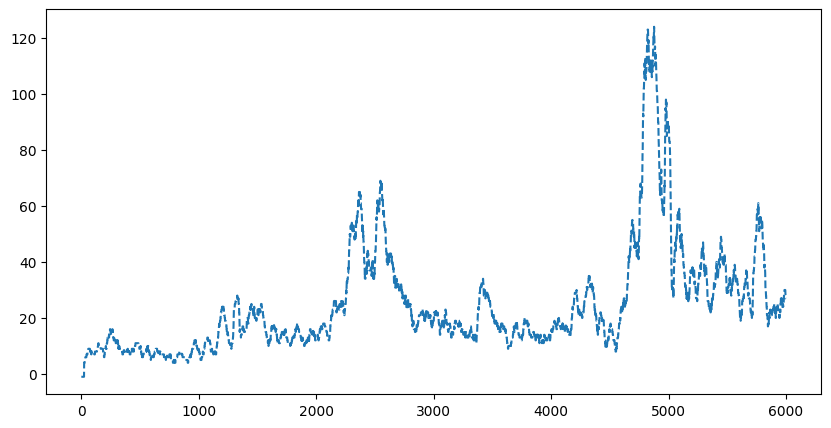

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(0,6000), df_train['filteredc4'].iloc[0:6000], label='Filtered EMG Data', linestyle='--')

### Identifying peaks and taking windows and marking dataset

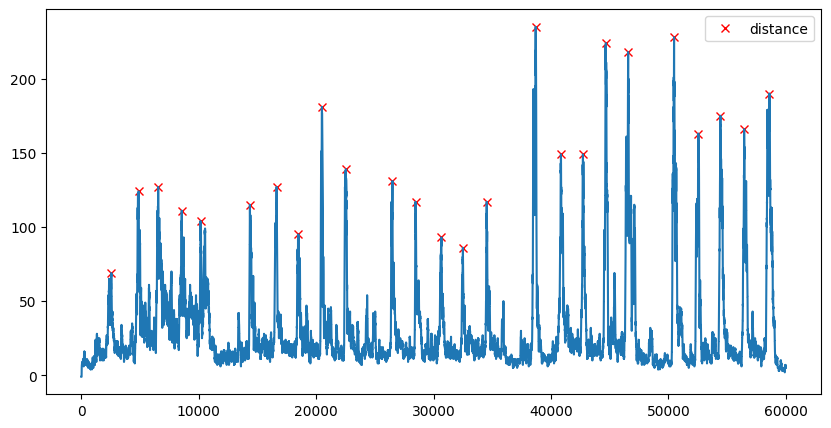

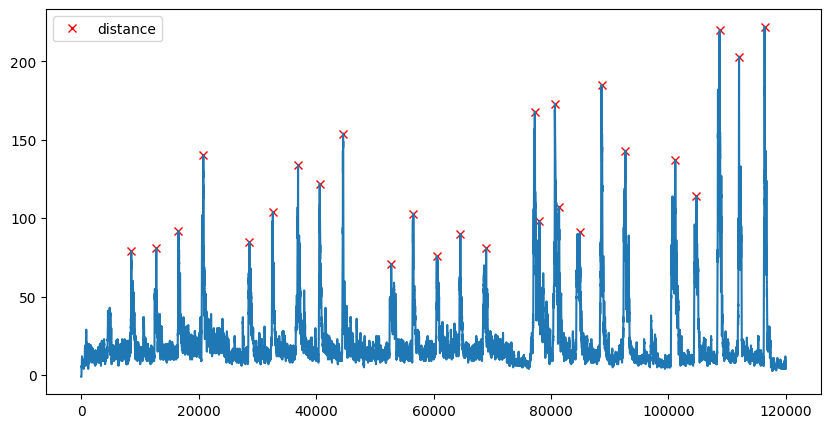

In [165]:
from scipy.signal import find_peaks
x=df_train['filteredc4'].iloc[0:60000]
peaks1, _ = find_peaks(x, prominence=60,distance=700)
plt.figure(figsize=(10, 5))
plt.plot(peaks1, x.iloc[peaks1], "xr"); plt.plot(range(0,60000),x); plt.legend(['distance'])

x=df_test['filteredc4'].iloc[0:120000]
peaks2, _ = find_peaks(x, prominence=60,distance=700)
plt.figure(figsize=(10, 5))
plt.plot(peaks2, x.iloc[peaks2], "xr"); plt.plot(range(0,120000),x); plt.legend(['distance'])

In [166]:
print(len(peaks1),len(peaks2))

25 26


In [146]:
label_train = ['rest' for i in range(60000)]
window = 250
for index,i in enumerate(peaks1):
    if index <len(peaks1)-1:
      center_pos=int((peaks1[index+1]+peaks1[index])/2)
      label_train[center_pos-50:center_pos+50]=['baseline' for _ in range(100)]
    if i <= 12000:
        label_train[i-window:i+window] = ['thumb' for _ in range(2*window)]
    elif i <= 24000:
        label_train[i-window:i+window] = ['index' for _ in range(2*window)]
    elif i <= 36000:
        label_train[i-window:i+window] = ['middle' for _ in range(2*window)]
    elif i <= 48000:
        label_train[i-window:i+window] = ['ring' for _ in range(2*window)]
    elif i <= 60000:
        label_train[i-window:i+window] = ['pinky' for _ in range(2*window)]
df_train['label'] = label_train

label_test = ['rest' for i in range(120000)]
window = 250
for index,i in enumerate(peaks2):
    if index <len(peaks2)-1:
      center_pos=int((peaks2[index+1]+peaks2[index])/2)
      label_test[center_pos-50:center_pos+50]=['baseline' for _ in range(100)]
    if i <= 26000:
        label_test[i-window:i+window] = ['thumb' for _ in range(2*window)]
    elif i <= 48000:
        label_test[i-window:i+window] = ['index' for _ in range(2*window)]
    elif i <= 72000:
        label_test[i-window:i+window] = ['middle' for _ in range(2*window)]
    elif i <= 96000:
        label_test[i-window:i+window] = ['ring' for _ in range(2*window)]
    elif i <= 120000:
        label_test[i-window:i+window] = ['pinky' for _ in range(2*window)]
df_test['label'] = label_test


C:\Users\Dev\AppData\Local\Temp\ipykernel_25816\1080189852.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['label'] = label_train
C:\Users\Dev\AppData\Local\Temp\ipykernel_25816\1080189852.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label'] = label_test


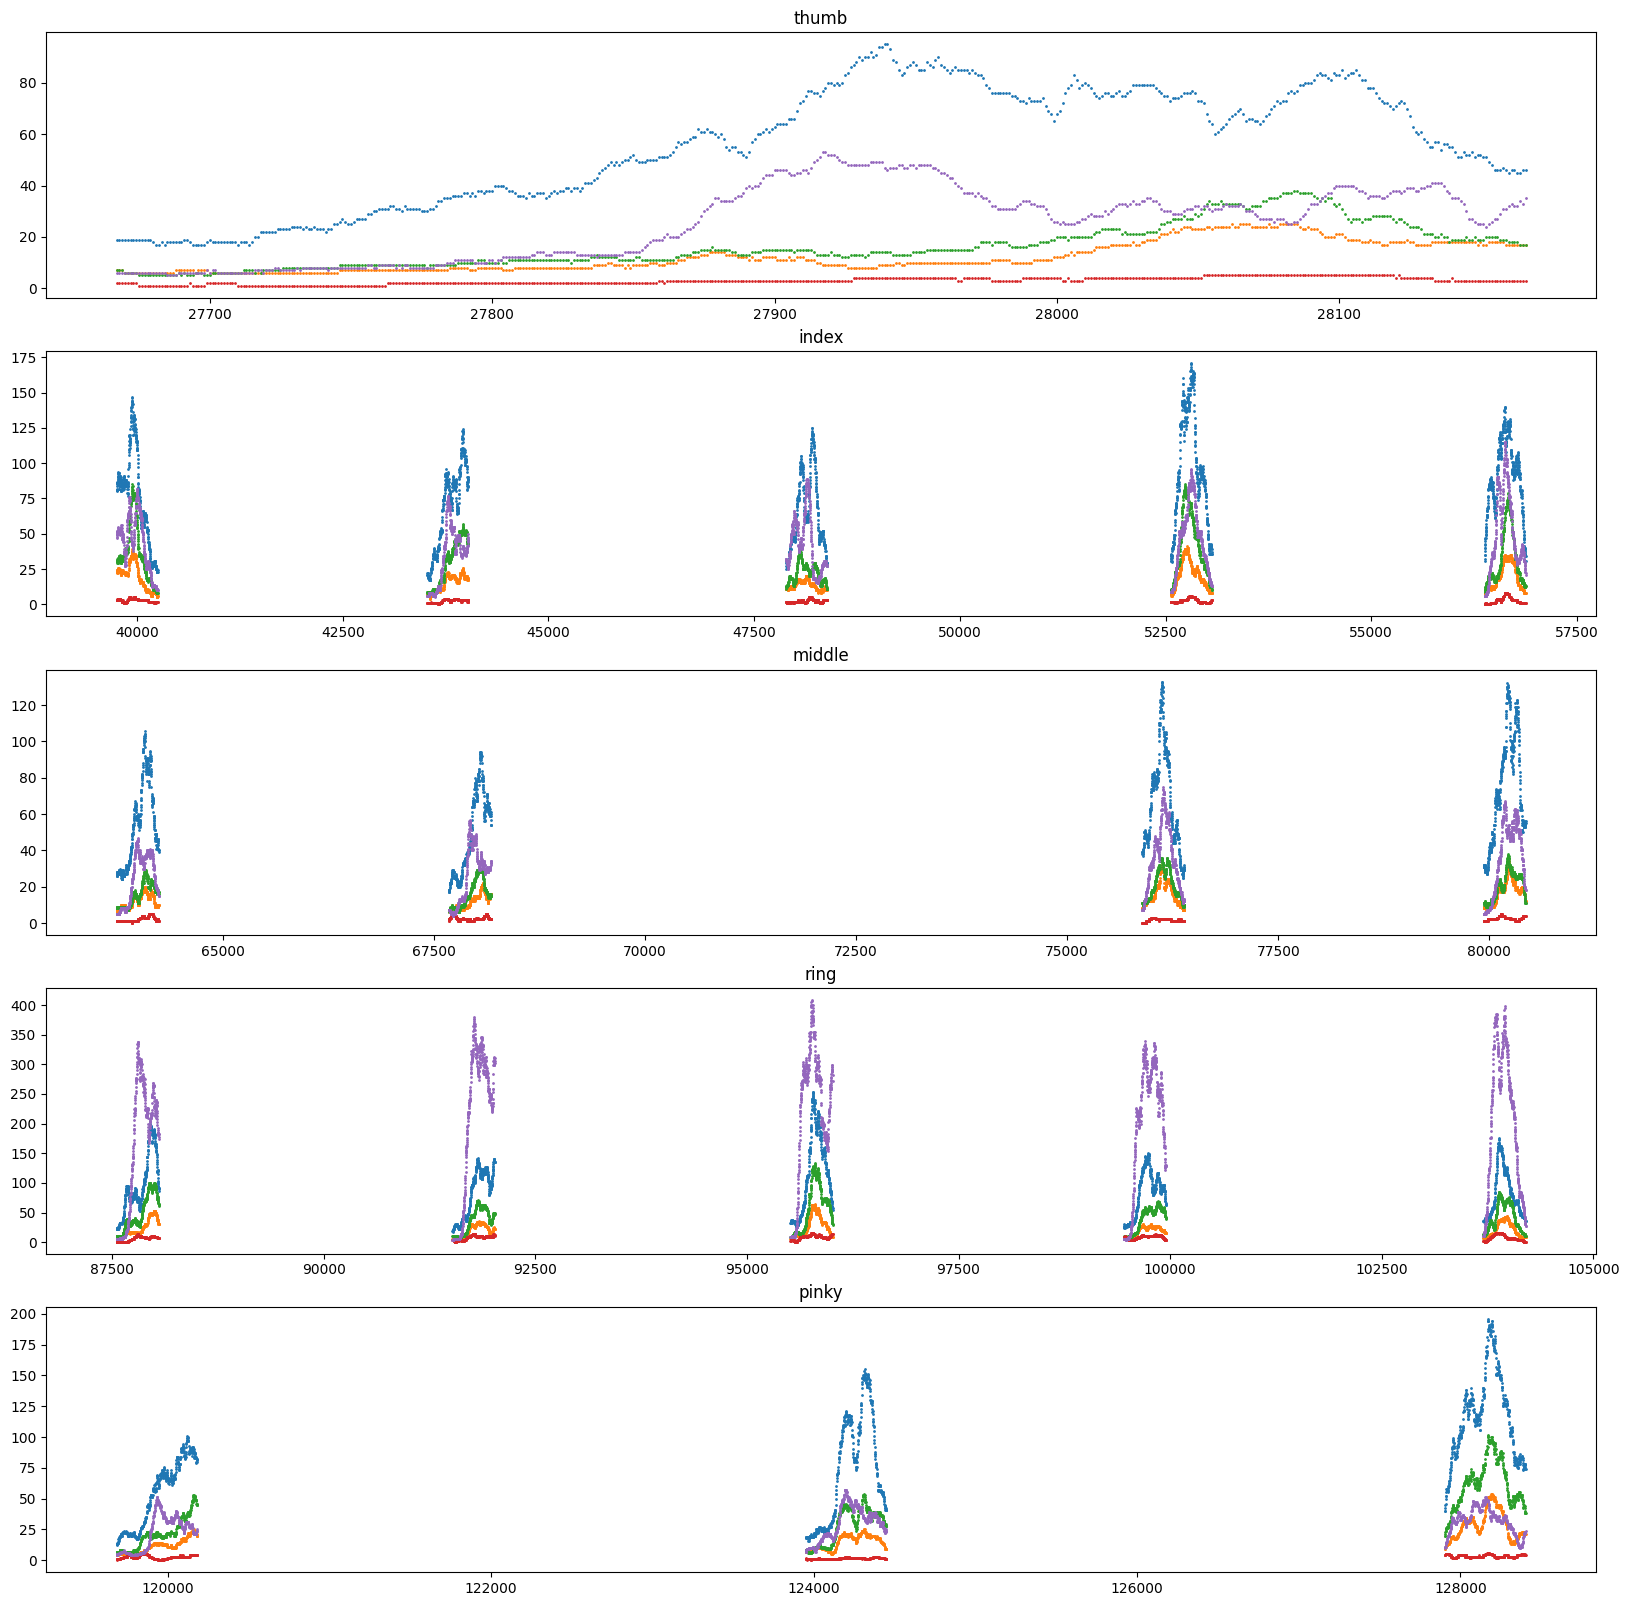

In [147]:
N_SIGNS = 5
N_ELECTRODES = 5
fig, ax = plt.subplots(N_SIGNS, figsize=(20, 20))
label_list = ["thumb", "index", "middle", "ring", "pinky"]
channel_labels = [f'Channel {i+1}' for i in range(N_ELECTRODES)]
for i, label_i in enumerate(label_list):
    sign_df = df_test[df_test.label == label_i].iloc[:120000]
    for electrode in range(N_ELECTRODES):
        ax[i].scatter(sign_df.index, sign_df.iloc[:, 6 + electrode], s=1,label=channel_labels[electrode])  # Use scatter for points, s=1 sets point size
        ax[i].title.set_text(label_i)

plt.show()

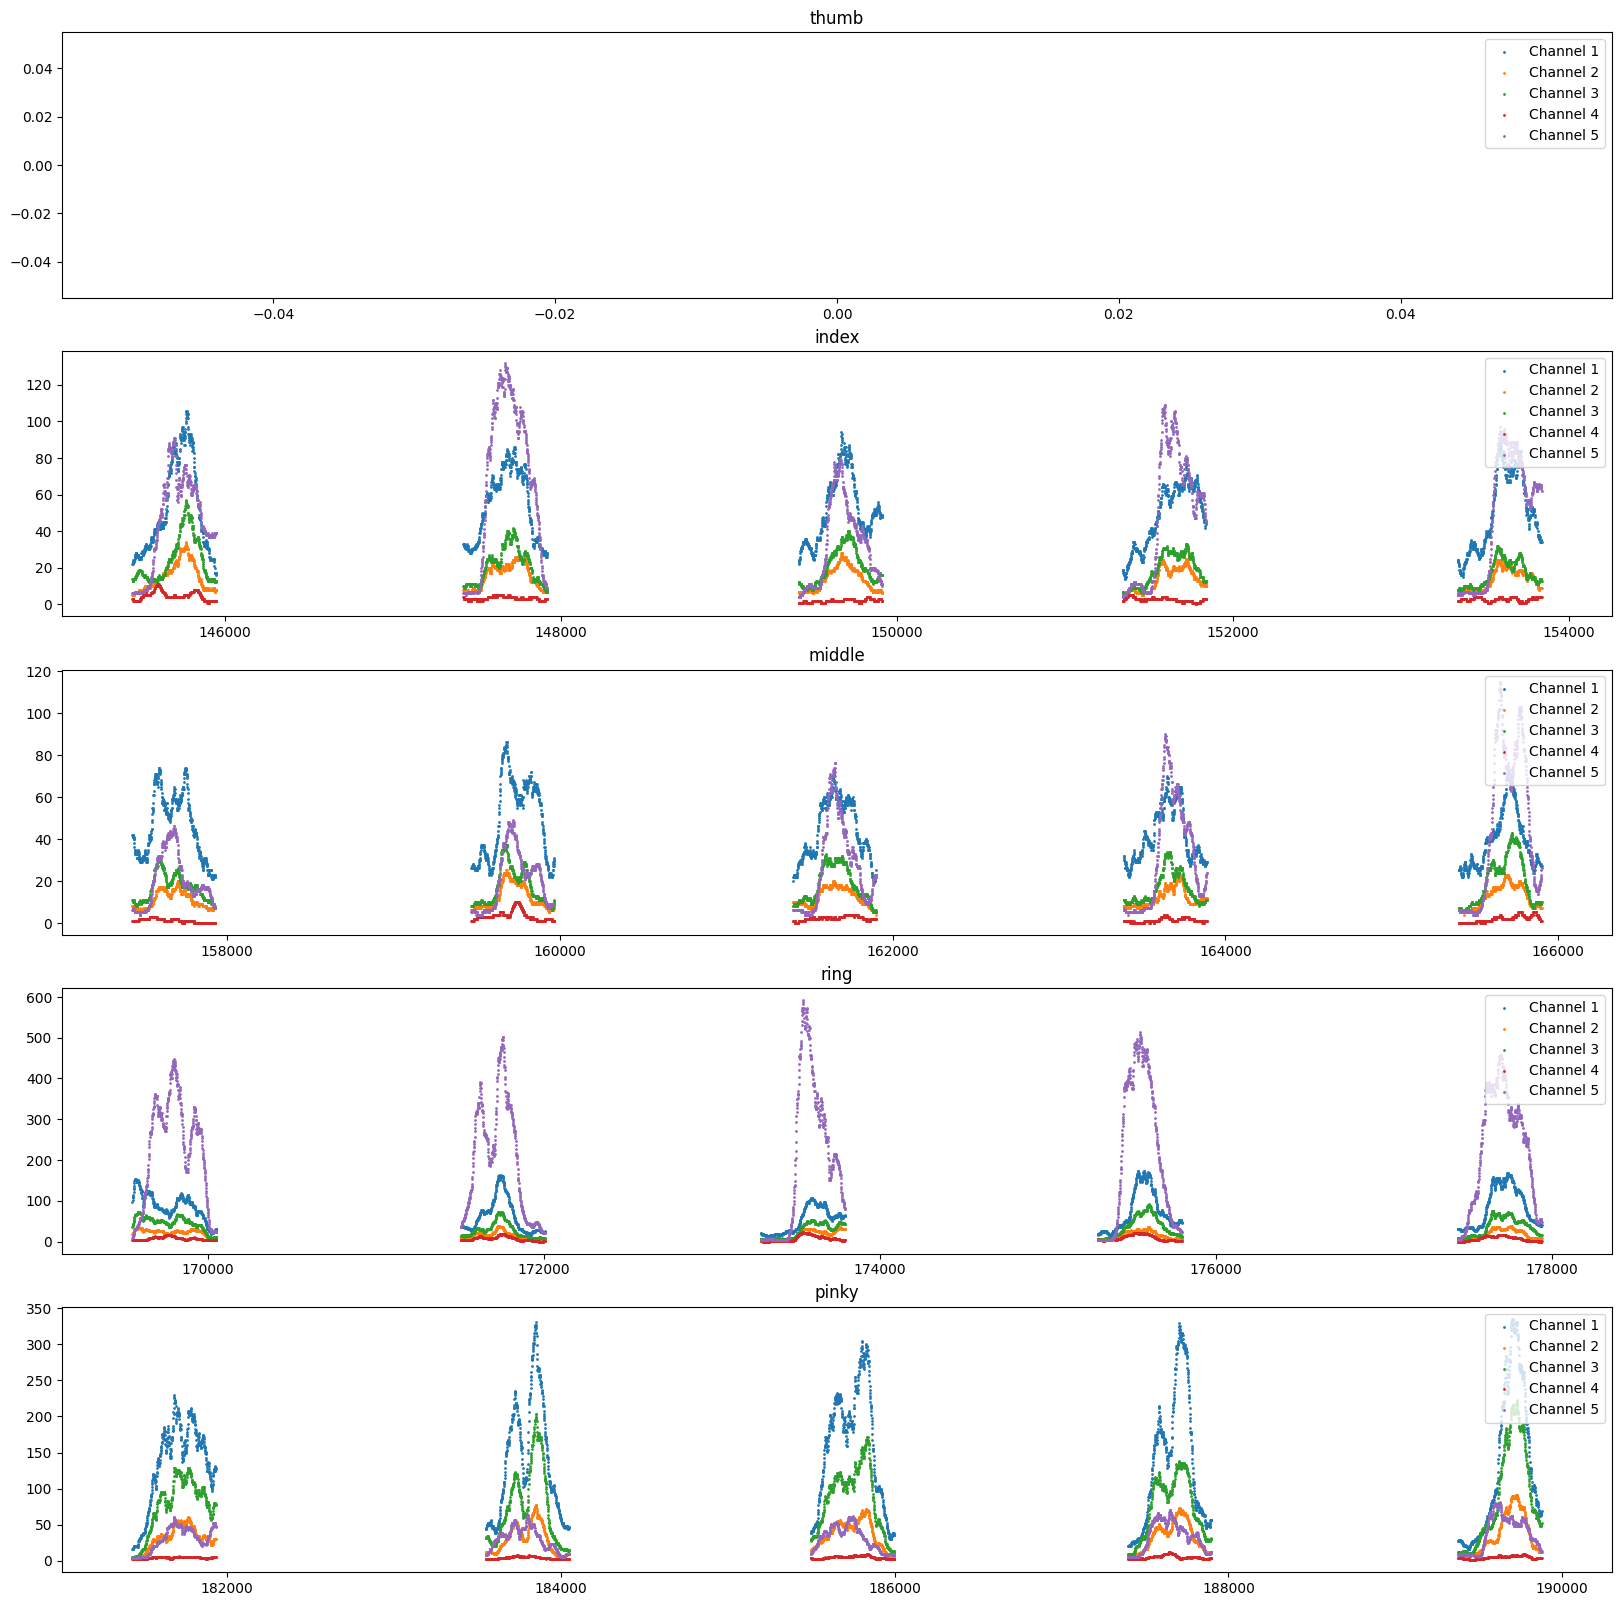

In [148]:
N_SIGNS = 5
N_ELECTRODES = 5
fig, ax = plt.subplots(N_SIGNS, figsize=(20, 20))
label_list = ["thumb", "index", "middle", "ring", "pinky"]
channel_labels = [f'Channel {i+1}' for i in range(N_ELECTRODES)]
for i, label_i in enumerate(label_list):
    sign_df = df_train[df_train.label == label_i].iloc[:60000]
    for electrode in range(N_ELECTRODES):
        ax[i].scatter(sign_df.index, sign_df.iloc[:, 6 + electrode], s=1,label=channel_labels[electrode])  # Use scatter for points, s=1 sets point size
        ax[i].title.set_text(label_i)
    ax[i].legend(loc='upper right')
plt.show()

In [149]:
df_train.to_csv(f'FilteredDataset/2SecondsIntervalDataset/{file_name}')
df_test.to_csv(f'FilteredDataset/4SecondsIntervalDataset/{file_name}')

### Calculating features for dataset for a window of 250 with peak as center

In [150]:
import numpy as np
def calculate_features(window_data):
    # Zero crossings
    # Mean absolute value
    mav = np.mean(np.abs(window_data))

    # Waveform length
    wl = np.sum(np.abs(np.diff(window_data)))

    # Root mean square
    rms = np.sqrt(np.mean(window_data**2))

    # Variance
    var = np.var(window_data)

    return mav, wl, rms, var

In [151]:
window = 125
features = []

# Iterate over the peaks
for index, i in enumerate(peaks1):
    features_row = []
    for channel in range(5):
        window_data = df_train[f'filteredc{channel}'].iloc[i-window:i+window]
        mav, wl, rms, var = calculate_features(window_data)
        features_row.extend([mav, wl, rms, var])

    if i <= 12000:
        features_row.append('thumb')
    elif i <= 24000:
        features_row.append('index')
    elif i <= 36000:
        features_row.append('middle')
    elif i <= 48000:
        features_row.append('ring')
    elif i <= 60000:
        features_row.append('pinky')

    features.append(features_row)

# Create a DataFrame from the features list
columns = [f'ch{ch}_{stat}' for ch in range(5) for stat in ['mav', 'wl', 'rms', 'var']]
columns.append('label')
df_train_features = pd.DataFrame(features, columns=columns)

for index,i in enumerate(peaks1):
    if index<len(peaks1)-1:
        features_row = []
        for channel in range (0,5):
                center_pos = int((peaks1[index+1] + peaks1[index]) / 2)
                window_data = df_train[f'filteredc{channel}'].iloc[center_pos-50:center_pos+50]
                mav, wl, rms, var = calculate_features(window_data)
                features_row.extend([mav, wl, rms, var])
        features_row.append('baseline')
        df_train_features.loc[len(df_train_features)] = features_row

In [152]:
df_train_features

,ch0_mav,ch0_wl,ch0_rms,ch0_var,ch1_mav,ch1_wl,ch1_rms,ch1_var,ch2_mav,ch2_wl,...,ch2_var,ch3_mav,ch3_wl,ch3_rms,ch3_var,ch4_mav,ch4_wl,ch4_rms,ch4_var,label
0,71.236,322,74.362544,455.220304,21.128,86,22.043049,39.503616,30.616,136,...,190.028544,5.908,23,6.299524,4.779536,63.840,272,65.742163,246.486400,index
1,70.588,274,71.069346,68.186256,21.348,85,21.527006,7.674896,28.776,130,...,39.013824,3.904,24,3.973915,0.550784,105.012,341,106.485135,311.563856,index
2,64.980,314,66.726636,230.043600,19.228,79,19.662655,16.904016,28.004,117,...,56.419984,2.112,10,2.212691,0.435456,49.264,217,52.710075,351.410304,index
3,53.396,211,54.724729,143.663184,16.140,73,17.165663,34.160400,23.188,104,...,47.664656,2.832,20,2.920274,0.507776,62.440,298,72.683478,1384.134400,index
4,61.696,280,64.887102,403.939584,16.328,82,17.233688,30.396416,20.964,101,...,42.530704,2.836,17,2.997999,0.945104,60.516,257,69.574449,1178.417744,index
5,59.284,239,59.849043,67.315344,14.540,64,14.745983,6.032400,21.624,106,...,19.394624,1.456,9,1.639512,0.568064,29.464,132,31.193204,104.888704,middle
6,62.452,277,64.079732,205.959696,16.804,79,17.502343,23.957584,23.664,111,...,52.343104,5.036,21,5.555898,5.506704,29.580,134,31.764446,134.003600,middle
7,56.008,231,56.576179,63.967936,15.856,58,16.054657,6.339264,25.240,99,...,32.262400,2.940,19,3.036445,0.576400,42.092,206,45.835750,329.179536,middle
8,52.000,227,52.846949,88.800000,14.616,77,15.257523,19.164544,21.436,106,...,50.941904,1.816,22,2.047437,0.894144,46.864,199,53.833298,701.789504,middle
9,48.736,203,50.478510,172.882304,16.452,67,16.857876,13.519696,28.104,118,...,76.461184,2.208,20,2.531403,1.532736,64.896,280,72.315199,1017.997184,middle


In [153]:
df_train_features.to_csv(f'FeaturesDataset/2SecondsIntervalDataset/{file_name}')

In [155]:
window = 125
features = []

# Iterate over the peaks
for index, i in enumerate(peaks2):
    features_row = []
    for channel in range(5):
        window_data = df_test[f'filteredc{channel}'].iloc[i-window:i+window]
        mav, wl, rms, var = calculate_features(window_data)
        features_row.extend([mav, wl, rms, var])

    if i <= 26000:
        features_row.append('thumb')
    elif i <= 48000:
        features_row.append('index')
    elif i <= 72000:
        features_row.append('middle')
    elif i <= 96000:
        features_row.append('ring')
    elif i <= 120000:
        features_row.append('pinky')

    features.append(features_row)

# Create a DataFrame from the features list
columns = [f'ch{ch}_{stat}' for ch in range(5) for stat in ['mav', 'wl', 'rms', 'var']]
columns.append('label')
df_test_features = pd.DataFrame(features, columns=columns)

for index,i in enumerate(peaks2):
    if index < len(peaks2) - 1:
        features_row = []
        for channel in range (0,5):
            center_pos = int((peaks2[index+1] + peaks2[index]) / 2)
            window_data = df_test[f'filteredc{channel}'].iloc[center_pos-50:center_pos+50]
            mav, wl, rms, var = calculate_features(window_data)
            features_row.extend([mav, wl, rms, var])
        features_row.append('baseline')
        df_test_features.loc[len(df_test_features)] = features_row



In [156]:
df_test_features

,ch0_mav,ch0_wl,ch0_rms,ch0_var,ch1_mav,ch1_wl,ch1_rms,ch1_var,ch2_mav,ch2_wl,...,ch2_var,ch3_mav,ch3_wl,ch3_rms,ch3_var,ch4_mav,ch4_wl,ch4_rms,ch4_var,label
0,65.404,256,67.745730,311.800784,10.940,54,11.385429,9.944400,14.840,63,...,14.534400,3.104,12,3.204996,0.637184,30.612,136,33.334247,174.077456,thumb
1,92.624,376,97.463511,919.930624,23.152,97,24.901887,84.088896,48.348,191,...,426.562896,3.528,13,3.597777,0.497216,55.044,237,57.215977,243.826064,index
2,72.364,323,74.050388,246.911504,16.516,75,17.043826,17.713744,29.896,131,...,123.701184,2.876,9,3.119615,1.460624,43.352,208,47.361166,363.684096,index
3,86.868,339,89.027748,379.890576,15.408,62,15.566631,4.913536,27.676,111,...,20.163024,2.792,17,2.994662,1.172736,49.924,235,54.729773,502.942224,index
4,128.296,531,131.201585,753.992384,28.508,114,29.389726,51.049936,60.412,213,...,245.058256,3.680,15,3.950696,2.065600,65.784,248,67.390741,213.977344,index
5,108.904,437,110.413840,331.134784,26.768,94,27.650533,48.026176,46.172,167,...,380.014416,4.456,20,4.829907,3.472064,73.012,343,75.855679,423.331856,index
6,63.224,273,66.779757,462.261824,13.464,74,13.937001,12.960704,16.784,80,...,41.897344,2.012,6,2.326371,1.363856,30.576,154,32.496154,121.108224,middle
7,51.128,213,55.409097,456.095616,11.016,46,11.414377,8.935744,17.768,78,...,51.906176,1.840,11,1.918333,0.294400,32.440,145,35.463559,205.310400,middle
8,87.324,408,90.204900,511.443024,21.112,104,21.658994,23.395456,27.696,120,...,30.235584,1.984,4,2.055237,0.287744,50.056,203,51.360140,132.260864,middle
9,91.468,403,93.831573,437.968976,21.080,98,21.864492,33.689600,24.448,105,...,38.807296,2.976,10,3.106123,0.791424,45.036,199,47.116494,191.722704,middle


In [157]:
df_test_features.to_csv(f'FeaturesDataset/4SecondsIntervalDataset/{file_name}')

In [158]:
df_features= pd.concat([df_train_features,df_test_features],ignore_index=True)
df_features.to_csv(f'FeaturesDataset/CombinedDataset/{file_name}')